In [51]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [52]:
def static_vars(**kwargs):
    def decorate(func):
        for k in kwargs:
            setattr(func, k, kwargs[k])
        return func
    return decorate


def read_csv(file, sep='\t'):
    dataset = []
    with open(file, 'r') as f:
        for line in f:
            arr = line.strip().split(sep)
            arr[0] = int(arr[0])
            arr[1] = float(arr[1])
            arr[2] = float(arr[2])
            datapoint = tuple(arr)
            dataset.append(datapoint)
    return dataset


def euclidean_distance(p1, p2):
    _, x1, y1 = p1
    _, x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)


def range_query(db, dist_fn, p, eps):
    return [q for q in db if dist_fn(p, q) <= eps]


@static_vars(cluster_id=0)
def dbscan(db, eps, minpts, dist_fn):
    NOISE = -1
    max_id = db[-1][0]
    labels = [None for _ in range(max_id + 1)]
    for p in tqdm(db, desc="dbscan"):
        id = p[0]
        if labels[id] != None:
            continue
        neighbors = range_query(db, dist_fn, p, eps)
        if len(neighbors) < minpts:
            labels[id] = NOISE
            continue
        cluster_id = dbscan.cluster_id
        dbscan.cluster_id += 1
        labels[id] = cluster_id
        neighbors.remove(p)
        seed_set = neighbors
        for q in seed_set:
            id = q[0]
            if labels[id] == NOISE:
                labels[id] = cluster_id
            if labels[id] != None:
                continue
            neighbors = range_query(db, dist_fn, q, eps)
            labels[id] = cluster_id
            if len(neighbors) < minpts:
                continue
            seed_set.extend(neighbors)
    return labels


def cluster(db, labels):
    clusters = [[] for _ in range(max(labels)+1)]
    for p, l in tqdm(zip(db, labels), desc="clustering"):
        clusters[l].append(p)
    clusters.sort(key=lambda c: len(c), reverse=True)
    return clusters

dbscan: 100%|██████████| 8000/8000 [00:11<00:00, 701.53it/s] 
clustering: 8000it [00:00, 6504057.38it/s]


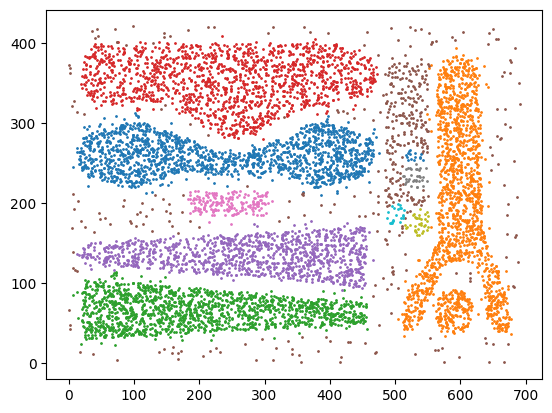

In [53]:
dbscan.cluster_id = 0
dataset = read_csv('./dataset/input1.txt', sep='\t')
labels = dbscan(dataset, 15, 22, euclidean_distance)
clusters = cluster(dataset, labels)

for clstr in clusters:
    _, X, Y = zip(*clstr)
    plt.scatter(X, Y, s=1)
plt.show()

dbscan: 100%|██████████| 2000/2000 [00:00<00:00, 2664.22it/s]
clustering: 2000it [00:00, 6061132.95it/s]


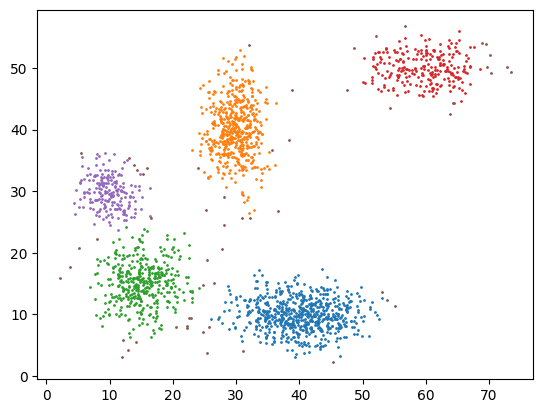

In [54]:
dbscan.cluster_id = 0
dataset = read_csv('./dataset/input2.txt', sep='\t')
labels = dbscan(dataset, 2, 7, euclidean_distance)
clusters = cluster(dataset, labels)

for clstr in clusters:
    _, X, Y = zip(*clstr)
    plt.scatter(X, Y, s=1)
plt.show()

dbscan: 100%|██████████| 2100/2100 [00:00<00:00, 2515.85it/s]
clustering: 2100it [00:00, 6032903.01it/s]


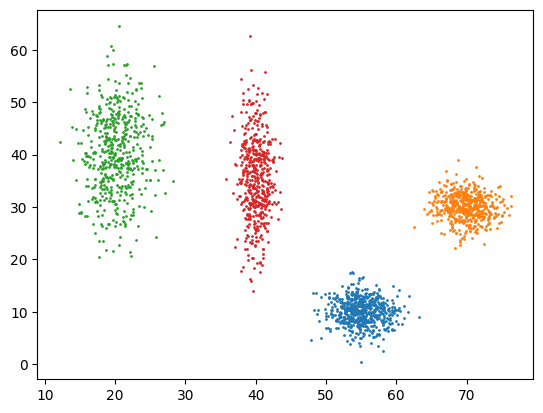

In [55]:
dbscan.cluster_id = 0
dataset = read_csv('./dataset/input3.txt', sep='\t')
labels = dbscan(dataset, 5, 5, euclidean_distance)
clusters = cluster(dataset, labels)

for clstr in clusters:
    _, X, Y = zip(*clstr)
    plt.scatter(X, Y, s=1)
plt.show()